## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

MSE no treinamento: 4778653586.80
MSE no teste: 5113808887.99


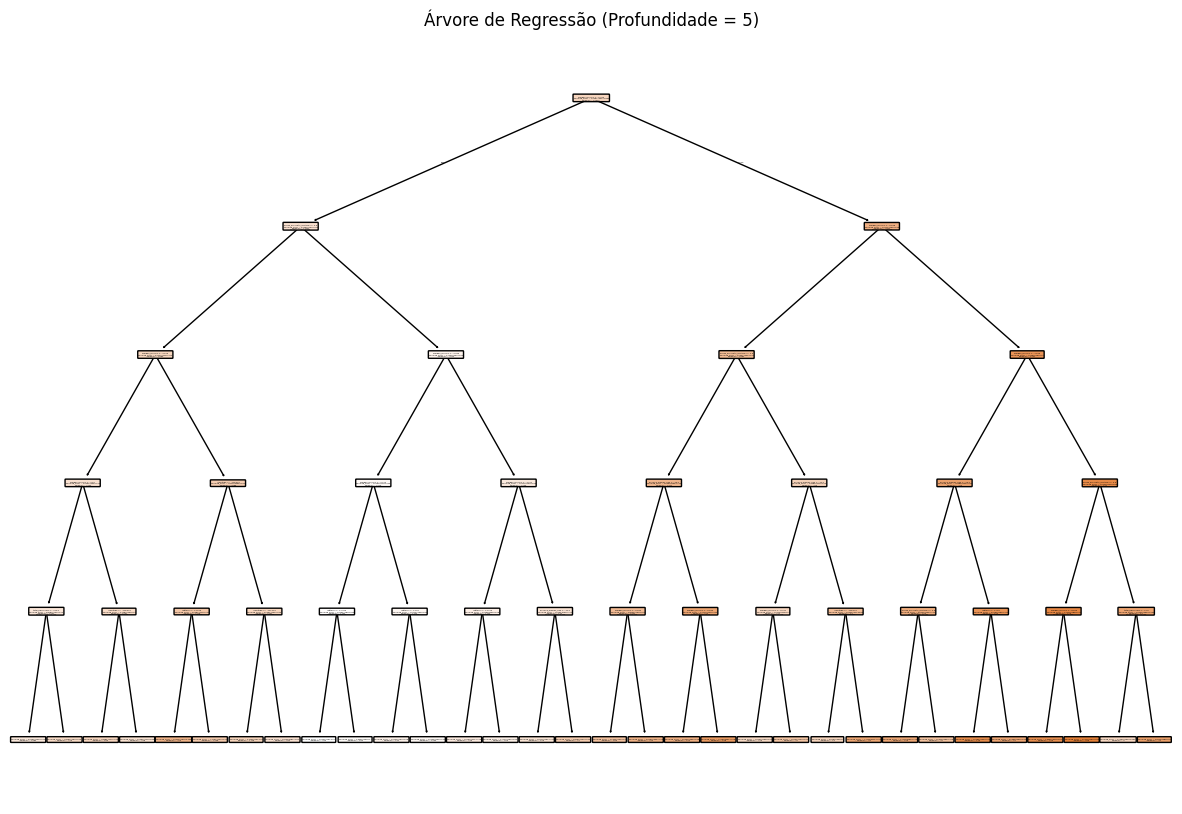

In [2]:
arquivo = "housing.csv"
housing_data = pd.read_csv(arquivo)

# Convertendo variáveis categóricas para numéricas
housing_data_encoded = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

# Separando variáveis preditoras e alvo
X = housing_data_encoded.drop(columns='median_house_value')
y = housing_data_encoded['median_house_value']

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinar o modelo de árvore de decisão
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

# Previsão nos dados de treinamento e teste
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Calculando o MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Exibindo os resultados
print(f"MSE no treinamento: {mse_train:.2f}")
print(f"MSE no teste: {mse_test:.2f}")

# Visualizando a árvore
plt.figure(figsize=(15, 10))
plot_tree(tree_regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Árvore de Regressão (Profundidade = 5)")
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

CCP-Alphas: [0.00000000e+00 4.18319131e+06 4.99666339e+06 5.19281538e+06
 5.86206239e+06 1.12415068e+07 1.13190087e+07 1.15147666e+07
 1.68706976e+07 1.92861560e+07 2.14295181e+07 2.23596328e+07
 2.27152453e+07 2.38330272e+07 2.48868077e+07 3.37810272e+07
 3.41811684e+07 3.75158077e+07 3.86440585e+07 4.16032220e+07
 6.00637236e+07 6.80981662e+07 9.36085402e+07 9.64173693e+07
 1.33567853e+08 1.73573235e+08 1.85216145e+08 1.91668916e+08
 5.38288744e+08 7.44333012e+08 1.67533461e+09 4.23754184e+09]
Impurezas acumuladas: [4.77865359e+09 4.78283678e+09 4.78783344e+09 4.79302626e+09
 4.79888832e+09 4.81012983e+09 4.82144883e+09 4.83296360e+09
 4.84983430e+09 4.86912045e+09 4.89054997e+09 4.91290961e+09
 4.93562485e+09 4.95945788e+09 4.98434469e+09 5.01812571e+09
 5.05230688e+09 5.08982269e+09 5.12846675e+09 5.17006997e+09
 5.23013369e+09 5.29823186e+09 5.39184040e+09 5.48825777e+09
 5.62182562e+09 5.79539886e+09 5.98061500e+09 6.17228392e+09
 6.71057266e+09 7.45490567e+09 9.13024028e+09 1.33

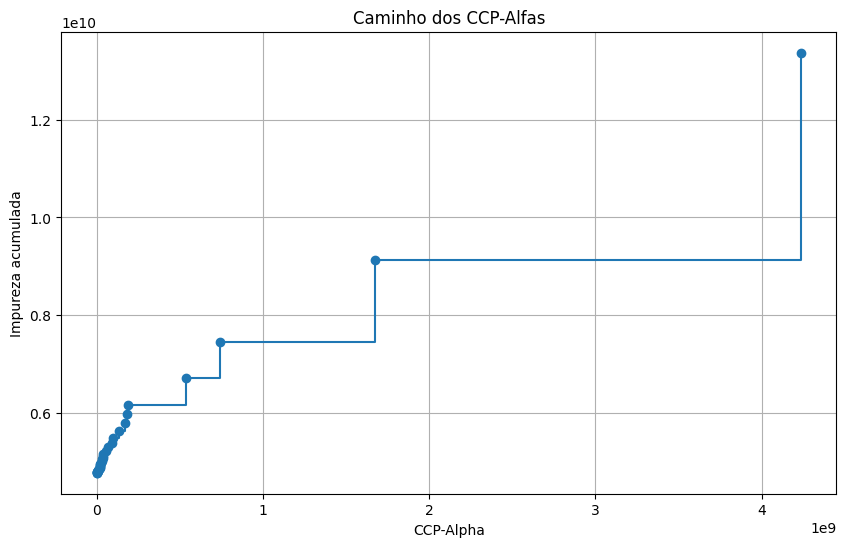

In [8]:
# Criando e ajustando novamente a árvore com profundidade definida
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

# Calculando o caminho dos CCP-alfas
ccp_path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas
impurities = ccp_path.impurities

# Exibindo os valores de CCP-Alfas e impurezas
print("CCP-Alphas:", ccp_alphas)
print("Impurezas acumuladas:", impurities)

# Visualizando graficamente o caminho dos CCP-Alfas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.title("Caminho dos CCP-Alfas")
plt.xlabel("CCP-Alpha")
plt.ylabel("Impureza acumulada")
plt.grid(True)
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
# Lista para armazenar os modelos treinados
trees = []

# Treinando uma árvore para cada valor de CCP-alpha
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Exibindo quantas árvores foram treinadas
print(f"Número de árvores treinadas: {len(trees)}")

# Exibindo a profundidade de cada árvore para análise inicial
depths = [tree.get_depth() for tree in trees]
print(f"Profundidades das árvores treinadas: {depths}")


Número de árvores treinadas: 32
Profundidades das árvores treinadas: [37, 15, 14, 14, 14, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 5, 4, 4, 3, 2, 2, 1, 0]


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [10]:
# Listas para armazenar os MSEs de treinamento e teste
mse_train_list = []
mse_test_list = []

# Calculando o MSE para cada árvore na lista
for tree in trees:
    # Previsões de treinamento e teste
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    # Calculando MSE e armazenar
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Exibindo os resultados
for i, alpha in enumerate(ccp_alphas):
    print(f"CCP-Alpha: {alpha:.4f} | MSE Treino: {mse_train_list[i]:.2f} | MSE Teste: {mse_test_list[i]:.2f}")


CCP-Alpha: 0.0000 | MSE Treino: 0.00 | MSE Teste: 4848725317.09
CCP-Alpha: 4183191.3063 | MSE Treino: 2635634387.68 | MSE Teste: 3703390568.31
CCP-Alpha: 4996663.3943 | MSE Treino: 2784568711.34 | MSE Teste: 3632357655.98
CCP-Alpha: 5192815.3775 | MSE Treino: 2825341852.92 | MSE Teste: 3609803969.87
CCP-Alpha: 5862062.3901 | MSE Treino: 2940726168.83 | MSE Teste: 3629755539.88
CCP-Alpha: 11241506.7676 | MSE Treino: 3545353296.17 | MSE Teste: 3968258416.35
CCP-Alpha: 11319008.6583 | MSE Treino: 3556672304.83 | MSE Teste: 3967640935.46
CCP-Alpha: 11514766.6406 | MSE Treino: 3579654922.90 | MSE Teste: 3959043704.33
CCP-Alpha: 16870697.5586 | MSE Treino: 3828847953.39 | MSE Teste: 4081368548.45
CCP-Alpha: 19286155.9557 | MSE Treino: 3880074421.40 | MSE Teste: 4129370963.41
CCP-Alpha: 21429518.1123 | MSE Treino: 3982548910.59 | MSE Teste: 4235488245.53
CCP-Alpha: 22359632.8058 | MSE Treino: 4092991478.76 | MSE Teste: 4291784588.31
CCP-Alpha: 22715245.3127 | MSE Treino: 4115351111.57 | MSE T

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

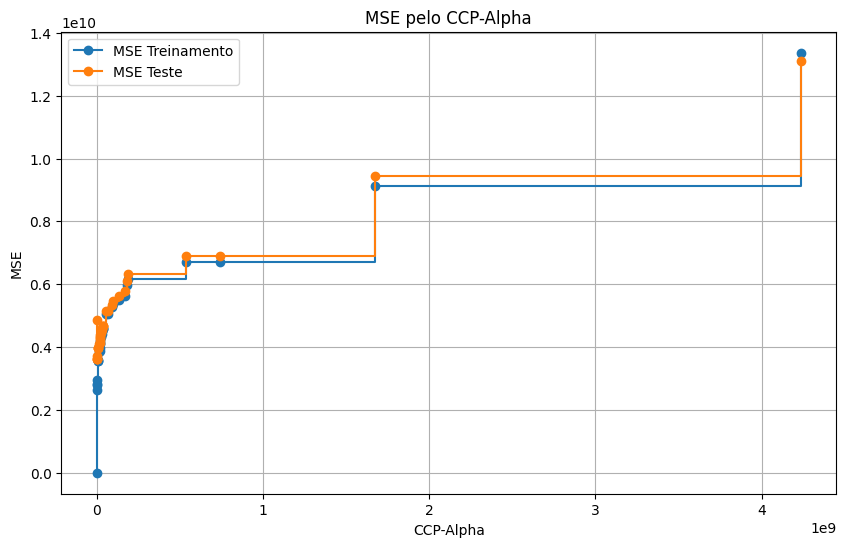

Melhor CCP-Alpha: 5192815.3775 com MSE de Teste: 3609803969.87


In [11]:
# Plotando o gráfico do MSE pelo CCP-alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train_list, label="MSE Treinamento", marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test_list, label="MSE Teste", marker='o', drawstyle="steps-post")
plt.xlabel("CCP-Alpha")
plt.ylabel("MSE")
plt.title("MSE pelo CCP-Alpha")
plt.legend()
plt.grid(True)
plt.show()

# Identificando o alfa com o menor MSE no conjunto de teste
min_mse_index = np.argmin(mse_test_list)
best_alpha = ccp_alphas[min_mse_index]

print(f"Melhor CCP-Alpha: {best_alpha:.4f} com MSE de Teste: {mse_test_list[min_mse_index]:.2f}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [12]:
# Treinando uma nova árvore com o melhor CCP-Alpha
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
best_tree.fit(X_train, y_train)

# Calculando o R-quadrado para os conjuntos de treinamento e teste
r2_train = best_tree.score(X_train, y_train)
r2_test = best_tree.score(X_test, y_test)

# Exibindo os resultados
print(f"R² Treinamento: {r2_train:.4f}")
print(f"R² Teste: {r2_test:.4f}")


R² Treinamento: 0.7886
R² Teste: 0.7245


### 7. Visualize esta árvore.

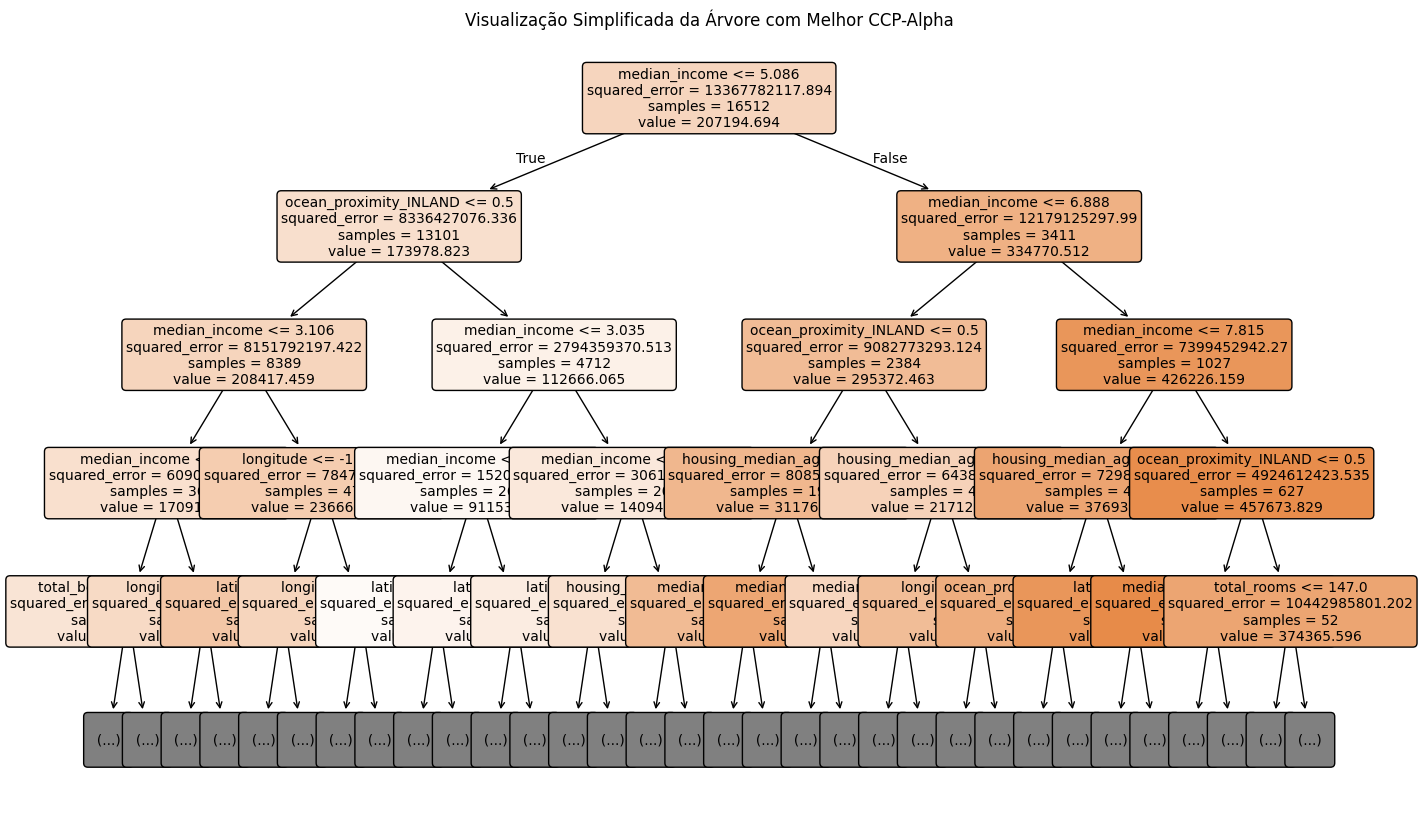

In [20]:
plt.figure(figsize=(16, 10))
plot_tree(
    best_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4
)
plt.title("Visualização Simplificada da Árvore com Melhor CCP-Alpha")
plt.show()
